[CN: F1G06] - Artificial Neural Networks in Clinical Examinations|

### Grupo 06

     pg41073 - Hugo Afonso Da Gião

     a73855  - José Lopes Ramos

     a77310  - Nuno Filipe Maranhão dos Reis



## Objetives

## Predict whether a mammogram mass is benign or malignant

We'll be using the "mammographic masses" public dataset.

This data contains 961 instances of masses detected in mammograms, and contains the following attributes:


   1. BI-RADS assessment: 1 to 5 (ordinal)  
   2. Age: patient's age in years (integer)
   3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
   4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
   5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
   6. Severity: benign=0 or malignant=1 (binominal)
   
BI-RADS is an assesment of how confident the severity classification is; it is not a "predictive" attribute and so we will discard it. The age, shape, margin, and density attributes are the features that we will build our model with, and "severity" is the classification we will attempt to predict based on those attributes.

Although "shape" and "margin" are nominal data types, which sklearn typically doesn't deal with well, they are close enough to ordinal that we shouldn't just discard them. The "shape" for example is ordered increasingly from round to irregular.

A lot of unnecessary anguish and surgery arises from false positives arising from mammogram results. 

Build a better way to interpret them through supervised machine learning.

## Your assignment

Apply Artificial Neural Network supervised machine learning techniques to this data set and validate it by applying K-Fold cross validation (K=10).

The data needs to be cleaned; many rows contain missing data, and there may be erroneous data identifiable as outliers as well.

Many optimization techniques provide the means of "hyperparameters" to be tuned (e.g. Genetic Algorithms). Once you identify a promising approach, see if you can make it even better by tuning its hyperparameters.

Below it's described the set of steps that outline the development of this project, with some guidance and hints. If you're up for a real challenge, try doing this project from scratch in a new, clean notebook!



Distribution per class: benign: 516; malignant: 445;

## Let's begin: prepare your data

Start by importing the mammographic_masses.data.txt file into a Pandas dataframe (hint: use read_csv) and take a look at it.

### Imports

In [1]:
import pandas as pd
import numpy as np
from statistics import *
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Import Dataset


In [2]:
data = pd.read_csv("mammographic_masses.data.txt", sep=",", header=None, na_values = '?').astype('float64')

In [3]:
data.head()

,0,1,2,3,4,5
0,5.0,67.0,3.0,5.0,3.0,1.0
1,4.0,43.0,1.0,1.0,NaN,1.0
2,5.0,58.0,4.0,5.0,3.0,1.0
3,4.0,28.0,1.0,1.0,3.0,0.0
4,5.0,74.0,1.0,5.0,NaN,1.0


Make sure you use the optional parmaters in read_csv to convert missing data (indicated by a ?) into NaN, and to add the appropriate column names (BI_RADS, age, shape, margin, density, and severity):

In [4]:
data.columns = ["BI-RADS", "Age", "Shape", "Margin", "Density", "Severity"]

In [5]:
data.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1.0
1,4.0,43.0,1.0,1.0,NaN,1.0
2,5.0,58.0,4.0,5.0,3.0,1.0
3,4.0,28.0,1.0,1.0,3.0,0.0
4,5.0,74.0,1.0,5.0,NaN,1.0


## Data Understading

### Feature Understanding

#### Bi-Rads

BI-RADS Assessment: 1-5 (ordinal);

Stands for Breast Imaging Reporting and Data System. 

https://www.cancer.org/cancer/breast-cancer/screening-tests-and-early-detection/mammograms/understanding-your-mammogram-report.html

Doctors use a standard system to describe mammogram findings and results. This system (called the Breast Imaging Reporting and Data System or BI-RADS) sorts the results into categories numbered 0 through 6.

By sorting the results into these categories, doctors can describe what they find on a mammogram using the same words and terms. This makes communicating about these test results and following up after the tests much easier.

Podemos entao ver que e um valor dado pelos medicos em função dos resultados dos exames.


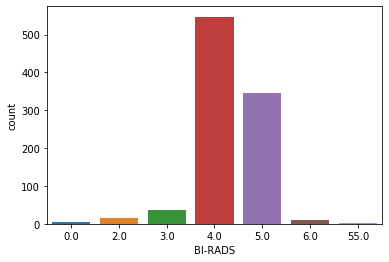

In [6]:
sns.countplot(x='BI-RADS',data=data)

#### Age

Age: Patient’s age accounted in years (integer);

A possibilidade de ter cancro da mama aumenta com o aumento da idade; uma mulher com mais de 60 anos apresenta maior risco. O cancro da mama é menos comum antes da menopausa.

In [ ]:
sns.countplot(x='Age',hue='Severity',data=data)

In [ ]:
sns.catplot(x="Severity", y="Age", kind="box", data=data);

#### Shape
Mass shape: round=1, oval=2, lobular=3, irregular=4 (nominal);

In [ ]:
sns.countplot(x='Shape',data=data)

#### Margin
Mass margin: circumscribed=1, micro-lobed=2, obscured=3, ill-defined=4, spiked=5
(nominal);

In [ ]:
sns.countplot(x='Margin',data=data)

#### Density
https://www.breastcancer.org/symptoms/testing/types/mammograms/results

Density é :
Mammogram reports also include an assessment of  breasts’ density. Dense breasts have less fatty tissue and more non-fatty tissue compared to breasts that aren’t dense. Dense breasts:

Breast density is categorized into four groups:
Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)

   1. Extremely dense: The breasts have a lot of fibrous and glandular tissue. This may make it hard to see a cancer on a mammogram because the cancer can blend in with the normal tissue.
   2. Consistent density: The breasts have many areas of fibrous and glandular tissue that are evenly distributed through the breasts. This can make it hard to see small masses in the breast.
   3. Scattered density: The breasts have quite a bit of fat, but there are a few areas of fibrous and glandular tissue.
   4. Mostly fatty: The breasts are made up of mostly fat and contain little fibrous and glandular tissue. This means the mammogram would likely show anything that was abnormal.







In [ ]:
sns.countplot(x='Density',data=data)

#### Severity

Severity: benign=0, malignant =1 (binominal);

In [ ]:
sns.countplot(x='Severity',data=data)

Evaluate whether the data needs cleaning; your model is only as good as the data it's given. Hint: use describe() on the dataframe.

In [ ]:
data.describe()

In [ ]:
sns.pairplot(data,hue='Severity')

There are quite a few missing values in the data set. Before we just drop every row that's missing data, let's make sure we don't bias our data in doing so. Does there appear to be any sort of correlation to what sort of data has missing fields? If there were, we'd have to try and go back and fill that data in.

## Data Preparation

There are quite a few missing values in the data set. Before we just drop every row that's missing data, let's make sure we don't bias our data in doing so. Does there appear to be any sort of correlation to what sort of data has missing fields? If there were, we'd have to try and go back and fill that data in.

Make sure you use the optional parmaters in read_csv to convert missing data (indicated by a ?) into NaN, and to add the appropriate column names (BI_RADS, age, shape, margin, density, and severity):

### Missing Data (NaN)

Podemos ver aqui que ha problemas por causa dos missing values. Antes de os retirarmos temos de ver se ao fazelo não vamos criar problemas de bias.

https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4

We have to understand the reason why data goes missing.

   1. Missing at Random (MAR): Missing at random means that the propensity for a data point to be missing is not related to the missing data, but it is related to some of the observed data.
   2. Missing Completely at Random (MCAR): The fact that a certain value is missing has nothing to do with its hypothetical value and with the values of other variables.
   3. Missing not at Random (MNAR): Two possible reasons are that the missing value depends on the hypothetical value (e.g. People with high salaries generally do not want to reveal their incomes in surveys) or missing value is dependent on some other variable’s value (e.g. Let’s assume that females generally don’t want to reveal their ages! Here the missing value in age variable is impacted by gender variable)


In the first two cases, it is safe to remove the data with missing values depending upon their occurrences, while in the third case removing observations with missing values can produce a bias in the model. So we have to be really careful before removing observations. Note that imputation does not necessarily give better results.

BI-RADS      2
Age          5
Shape       31
Margin      48
Density     76
Severity     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
BI-RADS     959 non-null float64
Age         956 non-null float64
Shape       930 non-null float64
Margin      913 non-null float64
Density     885 non-null float64
Severity    961 non-null float64
dtypes: float64(6)
memory usage: 45.2 KB


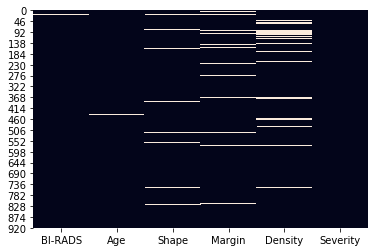

In [7]:
print(data.isna().sum(axis=0))
sns.heatmap(data.isnull(), cbar=False)
data.info()

If the missing data seems randomly distributed, go ahead and drop rows with missing data. Hint: use dropna().

In [8]:
data = data.dropna()

BI-RADS     0
Age         0
Shape       0
Margin      0
Density     0
Severity    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 830 entries, 0 to 960
Data columns (total 6 columns):
BI-RADS     830 non-null float64
Age         830 non-null float64
Shape       830 non-null float64
Margin      830 non-null float64
Density     830 non-null float64
Severity    830 non-null float64
dtypes: float64(6)
memory usage: 45.4 KB


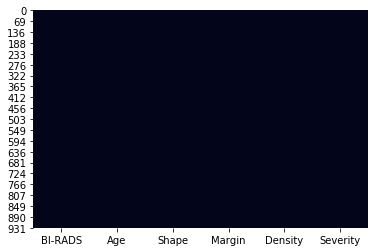

In [9]:
print(data.isna().sum(axis=0))
sns.heatmap(data.isnull(), cbar=False)
data.info()

//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


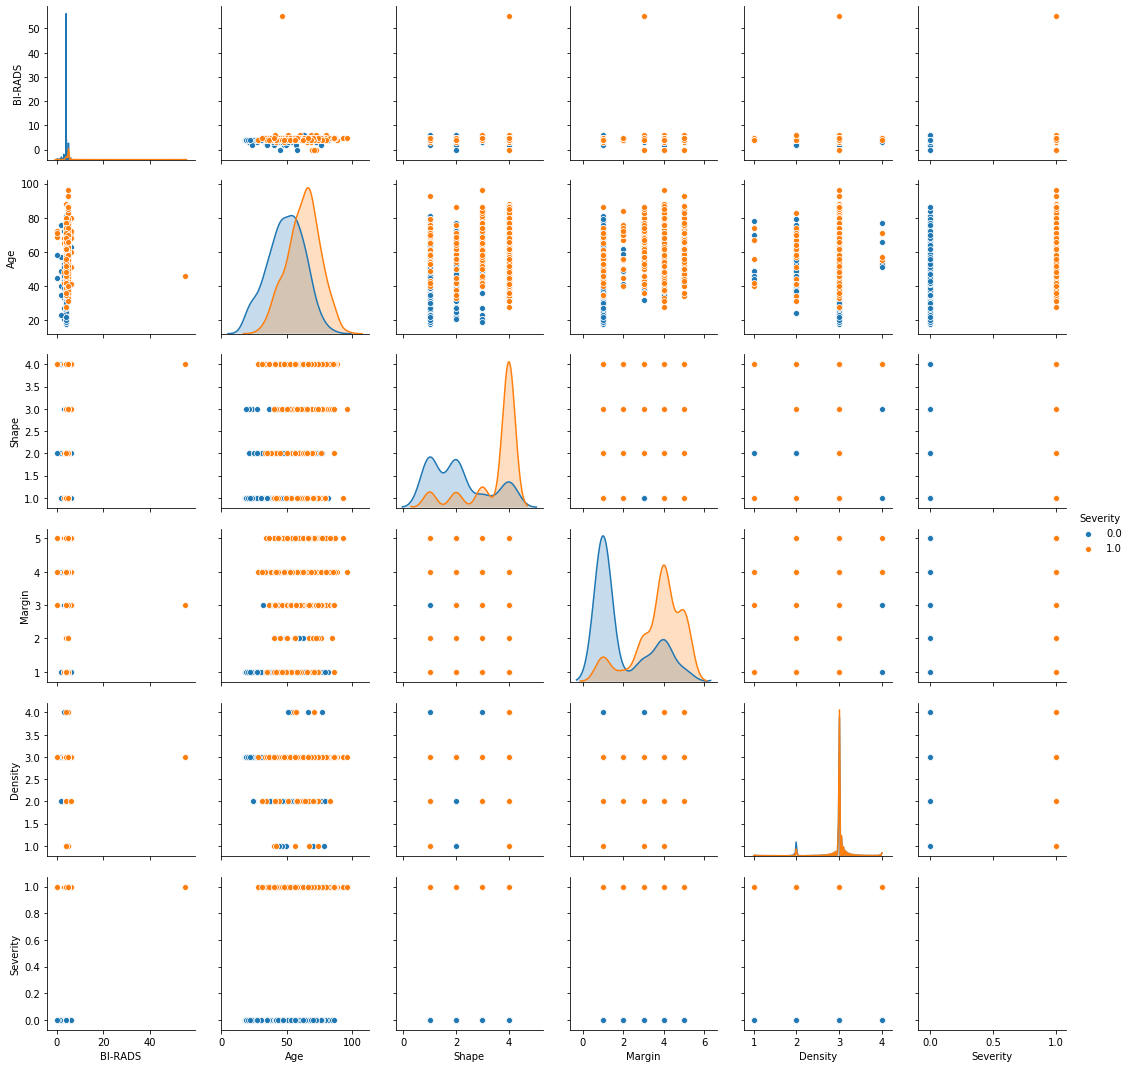

In [10]:
sns.pairplot(data,hue='Severity')

Next you'll need to convert the Pandas dataframes into numpy arrays that can be used by scikit_learn. Create an array that extracts only the feature data we want to work with (age, shape, margin, and density) and another array that contains the classes (severity). You'll also need an array of the feature name labels.

In [11]:
X = data.drop(['BI-RADS','Severity'], axis=1)
Y = data['Severity']
X=X.reset_index(drop=True)
Y=Y.reset_index(drop=True)

In [12]:
X.head()

,Age,Shape,Margin,Density
0,67.0,3.0,5.0,3.0
1,58.0,4.0,5.0,3.0
2,28.0,1.0,1.0,3.0
3,57.0,1.0,5.0,3.0
4,76.0,1.0,4.0,3.0


In [13]:
Y.head()

0    1.0
1    1.0
2    0.0
3    1.0
4    1.0
Name: Severity, dtype: float64

In [14]:
names = data.columns.drop(['BI-RADS','Severity'])

Some of our models require the input data to be normalized, so go ahead and normalize the attribute data. Hint: use preprocessing.StandardScaler().

### Standard Scaling

When using Neural Network and Deep Learning based systems, it is usually a good idea to Standardize your data.


VER MELHOR

*aqui pensar em se calhar estratificar as idades, por grupos de risco para facilitar o treino na rede neuronal

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.fit_transform(X)
df_feat = pd.DataFrame(scaled_features,columns=names)
X=df_feat

In [16]:
X.head()

,Age,Shape,Margin,Density
0,0.765063,0.175636,1.396185,0.240466
1,0.151271,0.981041,1.396185,0.240466
2,-1.894704,-1.435172,-1.157718,0.240466
3,0.083071,-1.435172,1.396185,0.240466
4,1.378855,-1.435172,0.757709,0.240466


## Neural Networks

You can use Tensorflow to set up a neural network with 1 binary output neuron and see how it performs. Don't be afraid to run a large number of epochs to train the model if necessary. As a bonus, try to optimize this model's hyperparameters using GA.

In [17]:
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
//anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1)

In [18]:
data.columns

Index(['BI-RADS', 'Age', 'Shape', 'Margin', 'Density', 'Severity'], dtype='object')

In [19]:
age = tf.feature_column.numeric_column("Age")
shape = tf.feature_column.numeric_column("Shape")
margin = tf.feature_column.numeric_column("Margin")
density = tf.feature_column.numeric_column("Density")

feat_cols = [age,shape,margin,density]

### Genetic Breeding :


In [20]:
from functools import reduce
from operator import add
import random


In [21]:
class Optimizer():
    """Class that implements genetic algorithm."""

    def __init__(self, nn_param_choices, retain=0.4,
                 random_select=0.1, mutate_chance=0.2):
        """Create an optimizer.
        Args:
            nn_param_choices (dict): Possible network paremters
            retain (float): Percentage of population to retain after
                each generation
            random_select (float): Probability of a rejected network
                remaining in the population
            mutate_chance (float): Probability a network will be
                randomly mutated
        """
        self.mutate_chance = mutate_chance
        self.random_select = random_select
        self.retain = retain
        self.nn_param_choices = nn_param_choices

        
        
    def create_population(self, count):
        """Create a population of random networks.
        Args:
            count (int): Number of networks to generate, aka the
                size of the population
        Returns:
            (list): Population of network objects
        """
        print("Start Create Pop.")
        pop = []
        for _ in range(0, count):
            # Create a random network.
            print("Start Create Pop.")
            network = Network(self.nn_param_choices)
            #network.create_random() Duvida aqui

            # Add the network to our population.
            pop.append(network)
        return np.array(pop)

    


    

    @staticmethod
    def fitness(network):
        """Return the accuracy, which is our fitness function."""
        return network.accuracy

    def grade(self, pop):
        """Find average fitness for a population.
        Args:
            pop (list): The population of networks
        Returns:
            (float): The average accuracy of the population
        """
        summed = reduce(add, (self.fitness(network) for network in pop))
        return summed / float((len(pop)))

    def breed(self, mother, father):
        """Make two children as parts of their parents.
        Args:
            mother (dict): Network parameters
            father (dict): Network parameters
        Returns:
            (list): Two network objects
        """
        children = []
        for _ in range(2):

            child = {}

            # Loop through the parameters and pick params for the kid.
            for param in self.nn_param_choices:
                child[param] = random.choice(
                    [mother.network[param], father.network[param]]
                )

            # Now create a network object.
            network = Network(self.nn_param_choices)
            network.create_set(child)

            # Randomly mutate some of the children.
            if self.mutate_chance > random.random():
                network = self.mutate(network)

            children.append(network)

        return children

    def mutate(self, network):
        """Randomly mutate one part of the network.
        Args:
            network (dict): The network parameters to mutate
        Returns:
            (Network): A randomly mutated network object
        """
        # Choose a random key.
        mutation = random.choice(list(self.nn_param_choices.keys()))

        # Mutate one of the params.
        network.network[mutation] = random.choice(self.nn_param_choices[mutation])

        return network

    def evolve(self, pop):
        """Evolve a population of networks.
        Args:
            pop (list): A list of network parameters
        Returns:
            (list): The evolved population of networks
        """
        # Get scores for each network.
        graded = [(self.fitness(network), network) for network in pop]

        # Sort on the scores.
        graded = [x[1] for x in sorted(graded, key=lambda x: x[0], reverse=True)]

        # Get the number we want to keep for the next gen.
        retain_length = int(len(graded)*self.retain)

        # The parents are every network we want to keep.
        parents = graded[:retain_length]

        # For those we aren't keeping, randomly keep some anyway.
        for individual in graded[retain_length:]:
            if self.random_select > random.random():
                parents.append(individual)

        # Now find out how many spots we have left to fill.
        parents_length = len(parents)
        desired_length = len(pop) - parents_length
        children = []

        # Add children, which are bred from two remaining networks.
        while len(children) < desired_length:

            # Get a random mom and dad.
            male = random.randint(0, parents_length-1)
            female = random.randint(0, parents_length-1)

            # Assuming they aren't the same network...
            if male != female:
                male = parents[male]
                female = parents[female]

                # Breed them.
                babies = self.breed(male, female)

                # Add the children one at a time.
                for baby in babies:
                    # Don't grow larger than desired length.
                    if len(children) < desired_length:
                        children.append(baby)

        parents.extend(children)

        return parents

## Network and Train

In [22]:
def update_classifier_parameters (parameters):
    
    h_u=[]
    a_f=[]
    for i in parameters[2]:
        print("TESTE,B.")
        h_u.append(parameters[1])
    print("TESTE.c")    
    a = parameters
    print("TESTE.D")
    b = a.pop(3) 
    if(b == 0): a_f = tf.nn.softmax 
    print("TESTE.E")
    if(b == 1): a_f = tf.nn.relu
    if(b == 2): a_f = tf.nn.leaky_relu
        
        
    
    classifier = tf.estimator.DNNClassifier(hidden_units=h_u,
                                           n_classes=2,
                                           feature_columns=feat_cols,
                                           #model_dir='C:\\Users\\jose\\Desktop\\RNAmodel',
                                           activation_fn=a_f,
                                           dropout=0.5,
                                           optimizer=tf.train.AdamOptimizer(
                                              learning_rate=parameters[0]
                                           ))
    print("h_u")
    print(h_u)
    print("a_f")
    print(type(a_f))
    return classifier

In [37]:
"""Class that represents the network to be evolved."""
import random
import logging


class Network():

    def __init__(self, nn_param_choices):
        """Initialize our network.
        Args:
            nn_param_choices (dict): Parameters for the network, includes:
                nb_neurons (list): [64, 128, 256]
                nb_layers (list): [1I , 2, 3, 4]
                activation (list): ['relu', 'elu']
                optimizer (list): ['rmsprop', 'adam']
        """
        self.accuracy = 0.
        self.nn_param_choices = nn_param_choices
        self.network = nn_param_choices  

    def create_random(self):
        """Create a random network."""
        for key in self.nn_param_choices:
            self.network[key] = random.choice(self.nn_param_choices[key])

    def create_set(self, network):
        """Set network properties.
        Args:
            network (dict): The network parameters
        """
        self.network = network

    def train(self, dataset):
        """Train the network and record the accuracy.
        Args:
            dataset (str): Name of dataset to use.
        """
        print("Enter Train.")
        if self.accuracy == 0.:
            print("...")
            self.accuracy = train_and_score(self.network, dataset)

    def print_network(self):
        """Print out a network."""
        logging.info(self.network)
        logging.info("Network accuracy: %.2f%%" % (self.accuracy * 100))
        
      
    
    
    

In [65]:
def train_and_score(networkparam, dataset):
        """Train the model, return test loss.

        Args:
            network (dict): the parameters of the network
            dataset (str): Dataset to use for training/evaluating

        """

        score = simicWay(networkparam)

        return score[1]  # 1 is accuracy. 0 is loss. 
    
def simicWay(networkparam):
    fold = 0
    all_test_samples=[]
    predicted_labels=[]
    scores=[]
    # Set defaults.
    nb_classes = 10
    batch_size = 20
    input_shape = (3072,)
    print("TESTE0.")
    
    classifier = update_classifier_parameters(networkparam)
    
    
    print("TESTE,2.")
    kf = KFold(n_splits=10)
    kf.get_n_splits(X)
    
    for train_index, test_index in kf.split(X):
        fold+=1
        print("Fold#{}".format(fold))
    
        X_train = X.values[train_index]
        y_train = Y[train_index]
        X_test = X.values[test_index]
        y_test = Y[test_index]

        X_train_df = pd.DataFrame(X_train,columns=names,index=train_index)
        X_test_df = pd.DataFrame(X_test,columns=names,index=test_index)
    
        print("TESTE1.")
        #defining input function to feed the classifier with training data
        input_func = tf.estimator.inputs.pandas_input_fn(x=X_train_df,
                                                         y=y_train,
                                                         batch_size=20,
                                                         shuffle=True)
        print("TESTE2.")
        #train the model
        classifier.train(input_fn=input_func,steps=500)
    
        print("TESTE3.")
        #make predictions based on testing data
        note_predictions = list(classifier.predict(input_fn=pred_fn))
        print("TESTE4.")
        #extract the labels
        final_preds=[]
        for pred in note_predictions:
            final_preds.append(pred['class_ids'][0])
            print("TESTE5.i")
        print("TESTE5.f")    
        #Adding all accuracy values to an array
        acc = accuracy_score(y_test,final_preds)
        print("TESTE ac")
        scores.append(acc)
        print("Fold-{}".format(fold),"Accuracy#{}".format(acc))
   

    return (acc)##???


# MAIN

In [61]:
"""Entry point to evolving the neural network. Start here."""
import logging
from tqdm import tqdm

# Setup logging.
logging.basicConfig(
    format='%(asctime)s - %(levelname)s - %(message)s',
    datefmt='%m/%d/%Y %I:%M:%S %p',
    level=logging.DEBUG,
    filename='log.txt'
)

def train_networks(networks, dataset):
    """Train each network.
    Args:
        networks (list): Current population of networks
        dataset (str): Dataset to use for training/evaluating
    """
    print("TRAIN NETWORK.")
    for network in networks:
        network.train(dataset)
        
    

def get_average_accuracy(networks):
    """Get the average accuracy for a group of networks.
    Args:
        networks (list): List of networks
    Returns:
        float: The average accuracy of a population of networks.
    """
    total_accuracy = 0
    for network in networks:
        total_accuracy += network.accuracy

    return total_accuracy / len(networks)

In [62]:
def generate(generations, population, nn_param_choices, dataset):
    """Generate a network with the genetic algorithm.
    Args:
        generations (int): Number of times to evole the population
        population (int): Number of networks in each generation
        nn_param_choices (dict): Parameter choices for networks
        dataset (str): Dataset to use for training/evaluating
    """
    
    optimizer = Optimizer(nn_param_choices)
    print("created Optimizer.")
    networks = optimizer.create_population(population)
    print("created Networks.")

    # Evolve the generation.
    for i in range(generations):
        logging.info("***Doing generation %d of %d***" %
                     (i + 1, generations))
        print("START TRAINING.")
        # Train and get accuracy for networks.
        train_networks(networks, dataset)
    print(" TRAINING.")
        # Get the average accuracy for this generation.
        average_accuracy = get_average_accuracy(networks)

        # Print out the average accuracy each generation.
        logging.info("Generation average: %.2f%%" % (average_accuracy * 100))
        logging.info('-'*80)

        # Evolve, except on the last iteration.
        if i != generations - 1:
            # Do the evolution.
            networks = optimizer.evolve(networks)

    # Sort our final population.
    networks = sorted(networks, key=lambda x: x.accuracy, reverse=True)

    # Print out the top 5 networks.
    print_networks(networks[:5])

IndentationError: unexpected indent (<ipython-input-62-2bdc9a217157>, line 24)

In [66]:
def nn_param_choices():
    population=[]
    
    for i in range(10):
        cromo=[]
        cromo.append(np.random.uniform(low=10**-2, high=10**-1))
        cromo.append(np.random.choice([1, 2, 4, 8, 16, 32, 64, 128, 256]))
        cromo.append(np.random.randint(low=1, high=20))
        cromo.append(np.random.randint(low=0, high=2))
        population.append(cromo)
        
    return np.array(population)

In [68]:
def main():
    """Evolve a network."""
    print("Evolve a network.")
    generations = 20  # Number of times to evole the population.
    population = 20  # Number of networks in each generation.
    dataset = data
    
    #parameters=[learning_rate,num_nodes,num_hidden_l,activation_fun]
    
    param_choices = nn_param_choices()
    print(param_choices)
        
        
        
    
        
        
        #'nb_neurons': [64, 128, 256, 512, 768, 1024],
        #'nb_layers': [1, 2, 3, 4],
        #'activation': ['relu', 'elu', 'tanh', 'sigmoid'],
        #'optimizer': ['rmsprop', 'adam', 'sgd', 'adagrad',
                      #'adadelta', 'adamax', 'nadam'],

    
    
    logging.info("***Evolving %d generations with population %d***" %
                 (generations, population))

    generate(generations, population, param_choices, dataset)

if __name__ == '__main__':
    main()

Evolve a network.
[[1.79097907e-02 3.20000000e+01 1.30000000e+01 0.00000000e+00]
 [2.64869201e-02 4.00000000e+00 1.50000000e+01 0.00000000e+00]
 [5.70563038e-02 2.56000000e+02 1.80000000e+01 0.00000000e+00]
 [3.42404073e-02 2.00000000e+00 5.00000000e+00 0.00000000e+00]
 [9.80697327e-02 1.00000000e+00 1.30000000e+01 0.00000000e+00]
 [3.76574275e-02 2.56000000e+02 1.60000000e+01 0.00000000e+00]
 [3.10194631e-02 1.00000000e+00 1.00000000e+00 0.00000000e+00]
 [1.28469105e-02 8.00000000e+00 1.10000000e+01 0.00000000e+00]
 [6.11257251e-02 1.00000000e+00 1.20000000e+01 0.00000000e+00]
 [7.19029711e-02 1.60000000e+01 1.80000000e+01 1.00000000e+00]]
created Optimizer.
Start Create Pop.
Start Create Pop.
Start Create Pop.
Start Create Pop.
Start Create Pop.
Start Create Pop.
Start Create Pop.
Start Create Pop.
Start Create Pop.
Start Create Pop.
Start Create Pop.
Start Create Pop.
Start Create Pop.
Start Create Pop.
Start Create Pop.
Start Create Pop.
Start Create Pop.
Start Create Pop.
Start Cr

AttributeError: 'numpy.ndarray' object has no attribute 'pop'